# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import basinhopping
from scipy.stats import pearsonr
from scipy.signal import medfilt

# Loading the data

In [3]:
df_a = pd.read_csv("mobility_data/apple_data/applemobilitytrends-2020-05-10.csv")
df_g = pd.read_csv("mobility_data/google_data/google_2020-05-13.csv")

C:\Users\ItayMNB7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_a.head()

,geo_type,region,transportation_type,alternative_name,13/01/2020,14/01/2020,15/01/2020,16/01/2020,17/01/2020,18/01/2020,...,01/05/2020,02/05/2020,03/05/2020,04/05/2020,05/05/2020,06/05/2020,07/05/2020,08/05/2020,09/05/2020,10/05/2020
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,...,37.23,29.36,36.00,43.69,42.61,43.11,46.13,45.78,41.59,45.39
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,...,38.68,32.28,43.41,49.59,46.44,52.84,52.37,48.10,44.86,68.87
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,...,22.69,28.23,16.44,32.01,33.63,35.13,35.56,40.25,33.82,19.82
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,...,16.62,20.61,12.44,21.35,22.63,23.84,23.84,30.63,24.84,15.58
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,...,58.40,48.67,58.18,62.51,64.04,66.19,71.34,67.64,50.96,63.56


# Playing with fitting

## Some games

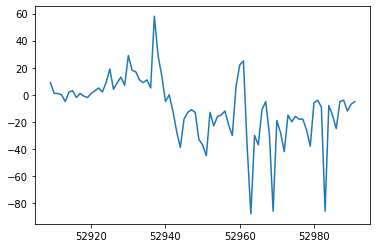

In [5]:
plt.plot(df_g[(df_g['country_region'] == 'Israel') & (df_g['country_region'] != np.nan)].grocery_and_pharmacy_percent_change_from_baseline.iloc[:83])

In [6]:
#type(df_g[(df_g['country_region'] == 'Israel')].sub_region_1.iloc[])

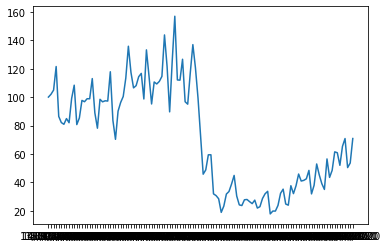

In [7]:
date_cols = [x for x in df_a.columns if '2020' in x]
df_tmp = df_a[(df_a.region == 'Israel') & (df_a.transportation_type == 'walking')]
plt.plot(date_cols,df_tmp[date_cols].values.flatten(),'-')

## Playing with Apple data

[114.41, 60, -3, 36.73] [44.95172489 56.59705106 -0.96454091 67.70964607]
(0.8185055597127311, 6.150750252693574e-30)
[[ 9.04173301e+00 -2.66629063e-02  4.51225488e-01 -4.32821639e+00]
 [-2.66629063e-02  8.06481258e-01 -1.33486085e-03 -2.91851656e-01]
 [ 4.51225488e-01 -1.33486085e-03  5.35333963e-01 -2.15997009e-01]
 [-4.32821639e+00 -2.91851656e-01 -2.15997009e-01  4.27311807e+00]]


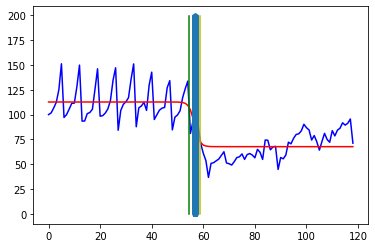

In [171]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return y


country = 'Norway'
transport_type = 'walking'

date_cols = [x for x in df_a.columns if '2020' in x]
df_tmp = df_a[(df_a.region == country) & (df_a.transportation_type == transport_type)]
xdata = np.arange(len(date_cols))
ydata = df_tmp[date_cols].values.flatten()
# L_0 = max(ydata)-min(ydata)
# x0_0 = np.argwhere(ydata < (100-min(ydata))/2)[0][0]
# k_0 = - 4 / (np.argwhere(ydata == min(ydata))[0][0] - np.argwhere(ydata == max(ydata)))[0][0]
# b_0 = - (min(ydata))
L_0 = (max(ydata) - min(ydata))
x0_0 = np.argwhere(ydata < (100 + min(ydata))/2)[0][0]
k_0 =  -3 # because sigmoid(x,k) = 0.95 when kx = -3 ??
b_0 = (min(ydata))
x1_0 = len(date_cols) - 30 # assumes sigmoid ends at the end of the data (i.e., quarantine wasn't over as soon as it reached maximal capacity)
a_0 = 1
p0 = [L_0, x0_0, k_0,b_0] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox', maxfev=10000)
print(p0,popt)
print(pearsonr(ydata,sigmoid(xdata,popt[0],popt[1],popt[2],popt[3])))
print(pcov)
plt.figure()
plt.plot(xdata,ydata,'b')
plt.plot(xdata,sigmoid(xdata,popt[0],popt[1],popt[2],popt[3]),'r')
plt.plot([popt[1]+2/popt[2]]*200, range(0,200), 'g')
plt.plot([popt[1]-2/popt[2]]*200, range(0,200), 'y')
plt.plot([popt[1]]*200, range(0,200), 'p')

C:\Users\ItayMNB7\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[97.75999999999999, 62, -3, 35.34, 89, 1] [58.75591947 63.28375238 -0.50231328 47.16073834 97.00000359  0.84726317]
(0.9552728832905883, 9.560311159121379e-64)
[[ 4.08611348e+00  1.42706069e-01  8.12473181e-02 -2.74502515e+00
  -3.23986424e+00  6.26052650e-10]
 [ 1.42706069e-01  2.89223274e-01  2.83752274e-03 -2.66284765e-01
  -3.14287391e-01  6.03297244e-11]
 [ 8.12473181e-02  2.83752274e-03  1.39348831e-02 -5.45814091e-02
  -6.44193930e-02  1.24479457e-11]
 [-2.74502515e+00 -2.66284765e-01 -5.45814091e-02  2.68236208e+00
   3.16590748e+00 -8.38058764e-10]
 [-3.23986424e+00 -3.14287391e-01 -6.44193930e-02  3.16590748e+00
   2.43132602e+01  1.21631386e+00]
 [ 6.26052641e-10  6.03297241e-11  1.24479460e-11 -8.38058767e-10
   1.21631386e+00  9.36852997e-02]]
Ukraine
(0.9552728832905883, 9.560311159121379e-64)
~Begining to enter quarentine: 61.29296290199744
~Begining of full quarentine: 65.27454186561461
How of fast entered to the quarentine: 3.981578963617168
Strength of quarentine: 0.5

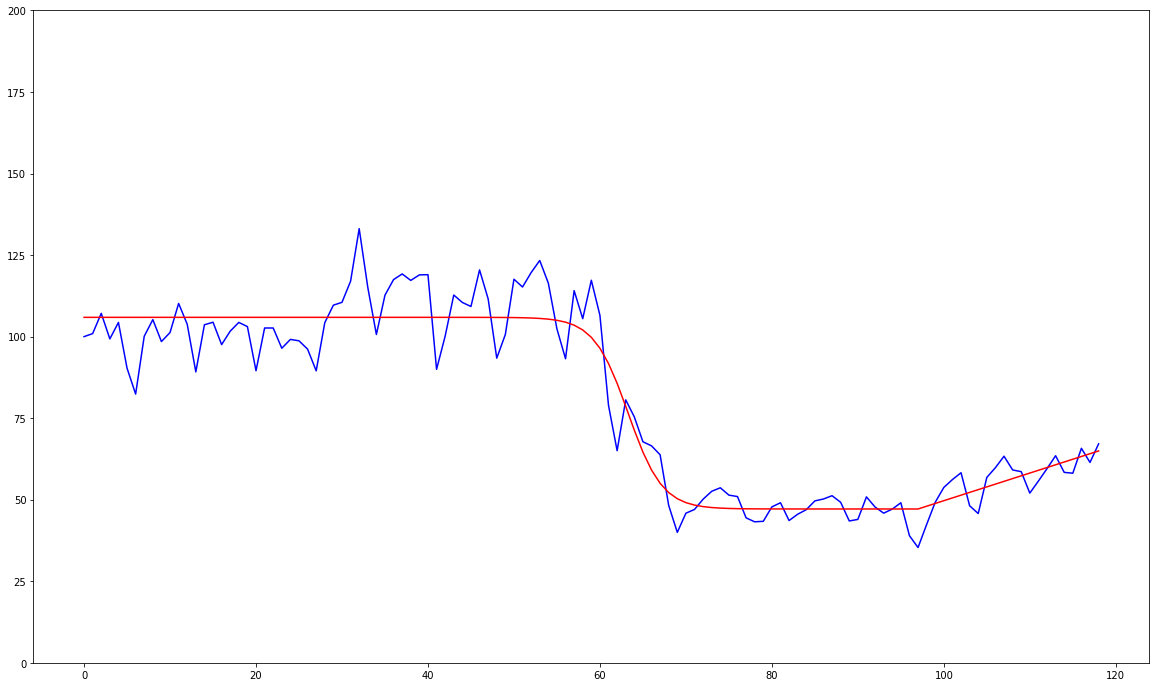

In [178]:
def sigmoid_plus(x, L ,x0, k, b, x1, a):
    if (x0<0) or (L<0) or (k>0):
        return x*0
    y1 = L / (1 + np.exp(-k*(x-x0))) + b
    if (int(x1)+1) < len(x) and (x1>x0):
        y2 = a*x - a*x1 + y1[int(x1)]
    y = y1
    if (int(x1)+1) < len(x) and (x1>x0):
        y[(int(x1)+1):] = y2[(int(x1)+1):] # y2[(int(x1)+1):]
    return y


country = 'Ukraine'
transport_type = 'walking'

date_cols = [x for x in df_a.columns if '2020' in x]
df_tmp = df_a[(df_a.region == country) & (df_a.transportation_type == transport_type)]
df_tmp.dropna(axis=1,inplace=True)
xdata = np.arange(len(date_cols))
ydata = df_tmp[date_cols].values.flatten()
# # Gil SP
# L_0 = (max(ydata)-min(ydata))#-30 #-60
# x0_0 = np.argwhere(ydata < (100+min(ydata))/2)[0][0]
# x1_0 = len(date_cols) #- 30#x0_0 + np.argwhere(ydata_tmp < (100+min(ydata_tmp))/2)[0][0]
# a_0 = 1
# #k_0 = -2 #-2
# b_0 = (min(ydata))
# My SP
L_0 = (max(ydata) - min(ydata))
x0_0 = np.argwhere(ydata < (100 + min(ydata))/2)[0][0]
k_0 =  -3 # because sigmoid(x,k) = 0.95 when kx = -3 ??
b_0 = (min(ydata))
x1_0 = len(date_cols) - 30 # assumes sigmoid ends at the end of the data (i.e., quarantine wasn't over as soon as it reached maximal capacity)
a_0 = 1
p0 = [L_0, x0_0, k_0,b_0,x1_0, a_0] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid_plus, xdata, ydata,p0, method='dogbox', maxfev=10000)
print(p0,popt)
print(pearsonr(ydata,sigmoid_plus(xdata,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])))
print(pcov)
plt.figure(figsize=(20,12))
plt.plot(xdata,ydata,'b')
plt.ylim([0,200])
plt.plot(xdata,sigmoid_plus(xdata,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]),'r')
print(country)
print(pearsonr(ydata,sigmoid_plus(xdata,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])))
print(f"~Begining to enter quarentine: {popt[1]+1/popt[2]}")
print(f"~Begining of full quarentine: {popt[1]-1/popt[2]}")
print(f"How of fast entered to the quarentine: {-2/popt[2]}")
print(f"Strength of quarentine: {popt[0]/(popt[3]+popt[0])}")
print(f"Length of full quarentine: {popt[4] - (popt[1]-1/popt[2])}")
print(f"Day started to quit quarentine: {popt[4]}")
print(f"How fast is quiting the quarentine: {(popt[5]/(popt[3]+popt[0]))*100}")

In [43]:
# L_0_init = (max(ydata)-min(ydata))
# L_0_vec = [x+L_0_init for x in [-60,-40,-20,0,20,40,60]]
# for L_0 in L_0_vec:
#     p0[0] = L_0
#     try:
#         popt, pcov = curve_fit(sigmoid_plus, xdata, ydata,p0, method='dogbox', maxfev=10000)
#         print(pearsonr(ydata,sigmoid_plus(xdata,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])))
#     except:
#         print('Failed')

In [44]:
# minimizer_kwargs = {"method": "BFGS"}
# ret = basinhopping(sigmoid_plus, [xdata]+p0, minimizer_kwargs=minimizer_kwargs, niter=200)


In [45]:
xdata

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118])

In [46]:
date_cols[0]

'13/01/2020'

In [47]:
x1_0

119

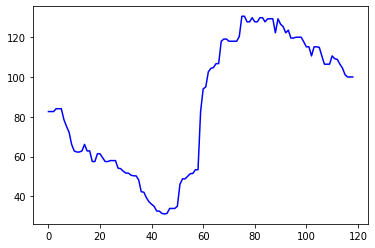

In [48]:
ydata_tmp = ydata[::-1]

plt.figure()
plt.plot(xdata,medfilt(ydata_tmp,9),'b')

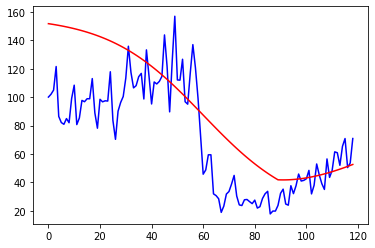

In [147]:
def sigmoid_plus(x, L ,x0, k, b, x1, a):
    if (x0<0) or (L<0) or (k>0):
        return x*0
    y1 = L / (1 + np.exp(-k*(x-x0))) + b
    y2 = a*x - a*x1 #+ y1[x1]
    y = y1
    if (int(x1)+1) < len(x) and (x1>x0):
        y[(int(x1)+1):] = y[(int(x1)+1):] + y2[(int(x1)+1):] # y2[(int(x1)+1):]
    return y


country = 'Israel'
transport_type = 'walking'

date_cols = [x for x in df_a.columns if '2020' in x]
df_tmp = df_a[(df_a.region == country) & (df_a.transportation_type == transport_type)]
xdata = np.arange(len(date_cols))
ydata = df_tmp[date_cols].values.flatten()
L_0 = (max(ydata)-min(ydata))# -30 #-60
x0_0 = np.argwhere(ydata < (100+min(ydata))/2)[0][0]
x1_0 = len(date_cols) - 30 #x0_0 + np.argwhere(ydata_tmp < (100+min(ydata_tmp))/2)[0][0]
a_0 = 1
k_0 =  - 2 / (np.argwhere(ydata == min(ydata))[0][0] - np.argwhere(ydata == max(ydata)))[0][0] #-2
b_0 = (min(ydata))
p0 = [L_0, x0_0, k_0,b_0,x1_0, a_0] # this is an mandatory initial guess
plt.figure()
plt.plot(xdata,ydata,'b')
plt.plot(xdata,sigmoid_plus(xdata,p0[0],p0[1],p0[2],p0[3],p0[4],p0[5]),'r')


# Getting features from the apple data

## Helper functions

In [159]:
# def sigmoid_plus(x, L ,x0, k, b, x1, a):
#     if (x0<0) or (L<0) or (k>0) or (x1<(x0-1/k)):
#         return x*0
#     y1 = L / (1 + np.exp(-k*(x-x0))) + b
#     y2 = a*x - a*x1
#     y = y1
#     if (int(x1)+1) < len(x) and (x1>(x0-1/k)):
#         y[(int(x1)+1):] = y[(int(x1)+1):] + y2[(int(x1)+1):]
#     return y

# def sigmoid_plus(x, L ,x0, k, b, x1, a):
#     if (x0<0) or (L<0) or (k>0):
#         return x*0
#     y1 = L / (1 + np.exp(-k*(x-x0))) + b
#     y2 = a*x - a*x1 + y1[int(x1)]
#     y = y1
#     if (int(x1)+1) < len(x) and (x1>x0):
#         y[(int(x1)+1):] = y2[(int(x1)+1):] # y2[(int(x1)+1):]
#     return y

def sigmoid_plus(x, L ,x0, k, b, x1, a):
    if (x0<0) or (L<0) or (k>0):
        return x*0
    y1 = L / (1 + np.exp(-k*(x-x0))) + b
    if (int(x1)+1) < len(x) and (x1>x0):
        y2 = a*x - a*x1 + y1[int(x1)]
    y = y1
    if (int(x1)+1) < len(x) and (x1>x0):
        y[(int(x1)+1):] = y2[(int(x1)+1):] # y2[(int(x1)+1):]
    return y


In [160]:
def fit_to_sigplus(df,country,transport_type):
    date_cols = [x for x in df.columns if '/2020' in x]
    df_tmp = df[(df.region == country) & (df.transportation_type == transport_type)]
    xdata = np.arange(len(date_cols))
    ydata = df_tmp[date_cols].values.flatten()
#     L_0 = (max(ydata)-min(ydata))-30
#     x0_0 = np.argwhere(ydata < (100+min(ydata))/2)[0][0]
#     ydata_tmp = ydata[::-1]
#     x1_0 = len(date_cols) - 30#x0_0 + np.argwhere(ydata_tmp < (100+min(ydata_tmp))/2)[0][0]
#     a_0 = 1
#     k_0 = -2
#     b_0 = (min(ydata))
    L_0 = (max(ydata) - min(ydata))
    x0_0 = np.argwhere(ydata < (100 + min(ydata))/2)[0][0]
    k_0 =  -3 # because sigmoid(x,k) = 0.95 when kx = -3 ??
    b_0 = (min(ydata))
    x1_0 = len(date_cols) - 30 # assumes sigmoid ends at the end of the data (i.e., quarantine wasn't over as soon as it reached maximal capacity)
    a_0 = 1
    p0 = [L_0, x0_0, k_0,b_0,x1_0, a_0] # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid_plus, xdata, ydata,p0, method='lm', maxfev=10000)
    pear_r,p_val = pearsonr(ydata,sigmoid_plus(xdata,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]))
    return popt, pcov, pear_r,p_val

In [161]:
def metrics_from_fit(popt,pear_r,prefix='',suffix=''):
    dict_out = {'t_beg_quar':(popt[1]+1/popt[2]),'t_full_quar':(popt[1]-1/popt[2]),
               't_eff_quar':(popt[1]),'t_to_quar':(-2/popt[2]),'strength_quar':(popt[0]/(popt[3]+popt[0])),
               't_len_quar':(popt[4] - (popt[1]-1/popt[2])),'t_start_out':popt[4],
               'slope_out':((popt[5]/(popt[3]+popt[0]))*100),'fit_pear_r':pear_r}
    dict_out = {(prefix+key+suffix):dict_out[key] for key in dict_out.keys()}
    return dict_out

In [120]:
metrics_from_fit(popt,pear_r)

NameError: name 'pear_r' is not defined

In [ ]:
prefix='a_'
suffix='_b'
dict_out = {(prefix+key+suffix):dict_out[key] for key in dict_out.keys()}
dict_out

In [ ]:
df_a.columns

In [ ]:
df_a.geo_type

## Fitting Apple Data

In [36]:
res_dic_zero = {'country' : np.nan,
 'a_walking_t_beg_quar': np.nan,
 'a_walking_t_full_quar': np.nan,
 'a_walking_t_eff_quar': np.nan,
 'a_walking_t_to_quar': np.nan,
 'a_walking_strength_quar': np.nan,
 'a_walking_t_len_quar': np.nan,
 'a_walking_t_start_out': np.nan,
 'a_walking_slope_out': np.nan,
 'a_walking_fit_pear_r': np.nan,
 'a_driving_t_beg_quar': np.nan,
 'a_driving_t_full_quar': np.nan,
 'a_driving_t_eff_quar': np.nan,
 'a_driving_t_to_quar': np.nan,
 'a_driving_strength_quar': np.nan,
 'a_driving_t_len_quar': np.nan,
 'a_driving_t_start_out': np.nan,
 'a_driving_slope_out': np.nan,
 'a_driving_fit_pear_r': np.nan,
 'a_transit_t_beg_quar': np.nan,
 'a_transit_t_full_quar': np.nan,
 'a_transit_t_eff_quar': np.nan,
 'a_transit_t_to_quar': np.nan,
 'a_transit_strength_quar': np.nan,
 'a_transit_t_len_quar': np.nan,
 'a_transit_t_start_out': np.nan,
 'a_transit_slope_out': np.nan,
 'a_transit_fit_pear_r': np.nan}
metrics_dict_full_zero = {}
for key in res_dic_zero.keys():
    metrics_dict_full_zero[key] = []
    res_dic_zero[key] = 'NaN'

In [37]:
metrics_dict_full_zero[key] == []

True

In [38]:
df_tmp = df_a[df_a.geo_type == 'country/region']
metrics_dict_full = metrics_dict_full_zero.copy()
for country in df_tmp.region.unique():
    print(country,end=", ")
    metrics_dict = res_dic_zero.copy()
    metrics_dict['country'] = country
    for transport_type in ['walking','driving','transit']:
        try:
            popt, pcov, pear_r, p_val = fit_to_sigplus(df=df_a,country=country,transport_type=transport_type)
            metrics_dict.update(metrics_from_fit(popt,pear_r,prefix='a_'+transport_type+'_',suffix=''))
        except:
            pass
    for key in metrics_dict.keys():
#         print(metrics_dict_full[key]==[])
        if metrics_dict_full[key] == []:
#             print('in if')
#             print([metrics_dict[key]])
#             print(metrics_dict_full[key])
            metrics_dict_full[key] = [metrics_dict[key]]
#             print([metrics_dict[key]])
#             print(metrics_dict_full[key])
        else:
#             print('in else')
#             print([metrics_dict[key]])
#             print(metrics_dict_full[key])
            metrics_dict_full[key] = metrics_dict_full[key] + [metrics_dict[key]]
#             print([metrics_dict[key]])
#             print(metrics_dict_full[key])
df_a_out = pd.DataFrame(metrics_dict_full)

Albania, Argentina, Australia, Austria, Belgium, Brazil, Bulgaria, Cambodia, Canada, Chile, Colombia, Croatia, Czech Republic, Denmark, Egypt, Estonia, Finland, France, Germany, Greece, Hong Kong, Hungary, Iceland, India, Indonesia, Ireland, Israel, Italy, Japan, Latvia, Lithuania, Luxembourg, Macao, Malaysia, Mexico, Morocco, Netherlands, New Zealand, Norway, Philippines, Poland, Portugal, Republic of Korea, Romania, Russia, Saudi Arabia, Serbia, Singapore, Slovakia, Slovenia, South Africa, Spain, Sweden, Switzerland, Taiwan, Thailand, Turkey, UK, Ukraine, United Arab Emirates, United States, Uruguay, Vietnam, 

In [39]:
df_a_out[['country','a_walking_fit_pear_r']].sort_values(by='a_walking_fit_pear_r')

,country,a_walking_fit_pear_r
0,Albania,NaN
33,Malaysia,NaN
34,Mexico,NaN
35,Morocco,NaN
36,Netherlands,NaN
...,...,...
26,Israel,NaN
27,Italy,NaN
28,Japan,NaN
15,Estonia,NaN


In [32]:
df_a_out

NameError: name 'df_a_out' is not defined

In [ ]:
df_a_out.to_csv('apple_processed_data_country_scope.csv')

In [ ]:
df_a_out.a_walking_fit_pear_r.hist()

In [ ]:
metrics_dict_full

In [ ]:
 metrics_dict[key]

In [ ]:
metrics_dict_full_zero[key]

In [ ]:
for key in metrics_dict.keys():
    print(key)
    print(metrics_dict[key])
    print(metrics_dict_full[key] == None)
    if metrics_dict_full[key] == None:
        print('in if')
        metrics_dict_full[key] = [metrics_dict[key]]
    else:
        print('in else')
        metrics_dict_full[key] = metrics_dict_full[key].append(metrics_dict[key])

In [ ]:
metrics_dict_full

In [ ]:
[].append('Ar')

In [ ]:
[].append(5)

In [ ]:
metrics_dict

In [ ]:
len(df_tmp.region.unique())

In [ ]:
df_tmp = df_a[df_a.geo_type == 'country/region']
#df_tmp = df_a.iloc[[0,1]]
df_tmp

In [ ]:
df_a.region.unique()

In [99]:
df_grocery = pd.read_csv("data/mobility_data/google_data/grocery_and_pharmacy_percent_change_from_baseline_by_country_region.csv")

In [105]:
date_cols_g = [x for x in df_grocery.columns if '2020' in x]
date_cols_a = [x for x in df_a.columns if '2020' in x]
#date_cols_a, date_cols_g

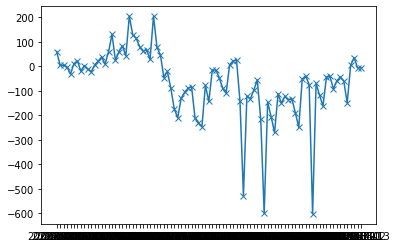

In [108]:
df_tmp = df_grocery[df_grocery['country_region'] == 'Israel']
plt.plot(df_tmp[date_cols_g].T,'x-')

In [109]:
date_cols_a

['13/01/2020',
 '14/01/2020',
 '15/01/2020',
 '16/01/2020',
 '17/01/2020',
 '18/01/2020',
 '19/01/2020',
 '20/01/2020',
 '21/01/2020',
 '22/01/2020',
 '23/01/2020',
 '24/01/2020',
 '25/01/2020',
 '26/01/2020',
 '27/01/2020',
 '28/01/2020',
 '29/01/2020',
 '30/01/2020',
 '31/01/2020',
 '01/02/2020',
 '02/02/2020',
 '03/02/2020',
 '04/02/2020',
 '05/02/2020',
 '06/02/2020',
 '07/02/2020',
 '08/02/2020',
 '09/02/2020',
 '10/02/2020',
 '11/02/2020',
 '12/02/2020',
 '13/02/2020',
 '14/02/2020',
 '15/02/2020',
 '16/02/2020',
 '17/02/2020',
 '18/02/2020',
 '19/02/2020',
 '20/02/2020',
 '21/02/2020',
 '22/02/2020',
 '23/02/2020',
 '24/02/2020',
 '25/02/2020',
 '26/02/2020',
 '27/02/2020',
 '28/02/2020',
 '29/02/2020',
 '01/03/2020',
 '02/03/2020',
 '03/03/2020',
 '04/03/2020',
 '05/03/2020',
 '06/03/2020',
 '07/03/2020',
 '08/03/2020',
 '09/03/2020',
 '10/03/2020',
 '11/03/2020',
 '12/03/2020',
 '13/03/2020',
 '14/03/2020',
 '15/03/2020',
 '16/03/2020',
 '17/03/2020',
 '18/03/2020',
 '19/03/20